# Abstract: 
    
    The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. 

Features consist of hourly average ambient variables 

    Temperature (T),

    Ambient Pressure (AP), 

    Relative Humidity (RH) and
    Exhaust Vacuum (V) 

    To Predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another.

While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.



Attribute Information:

Features consist of hourly average ambient variables

    - Temperature (T) in the range 1.81°C and 37.11°C,

    - Ambient Pressure (AP) in the range 992.89-1033.30 milibar,

    - Relative Humidity (RH) in the range 25.56% to 100.16%

    - Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

    - Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

The two most discussed scaling methods are Normalization and Standardization. Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance)

"""

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

UCI LINK

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#warnings

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Folds5x2_pp.xlsx")
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
results = smf.ols("PE~AT+V+AP+RH", data=data).fit()

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:43:33   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
 data.shape

(9568, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
data.columns


Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [10]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [11]:
counts = data.nunique()
counts

AT    2773
V      634
AP    2517
RH    4546
PE    4836
dtype: int64

In [12]:
#Using pandas rename() function


data.rename(columns={"AT":"Temperature (T)"},inplace=True)
data.rename(columns={"V":"Exhaust Vacuum (V)"},inplace=True)
data.rename(columns={"AP":"Ambient Pressure (AP)"},inplace=True)
data.rename(columns={"RH":"Relative Humidity (RH)"},inplace=True)
data.rename(columns={"PE":"Net hourly electrical energy"},inplace=True)


In [13]:
data

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


print(data[data.columns].value_counts())

data.value_counts()

data[data.columns].value_counts()

# list with each item representing a column
ls = []
for col in data.columns:
    # convert pandas series to list
    col_ls = data[col].tolist()
    # append column list to ls
    ls.append(col_ls)
# print the created list
print(ls)


https://datascienceparichay.com/article/pandas-dataframe-to-a-list-in-python/

In [14]:
data

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

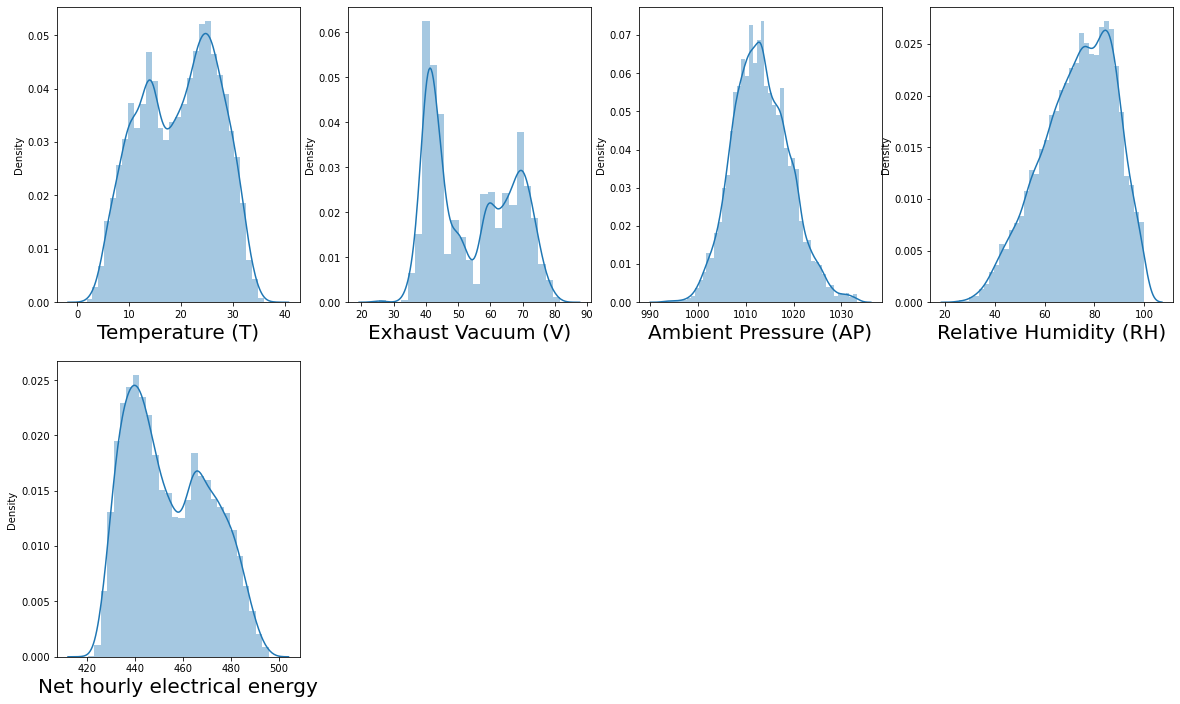

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=5 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


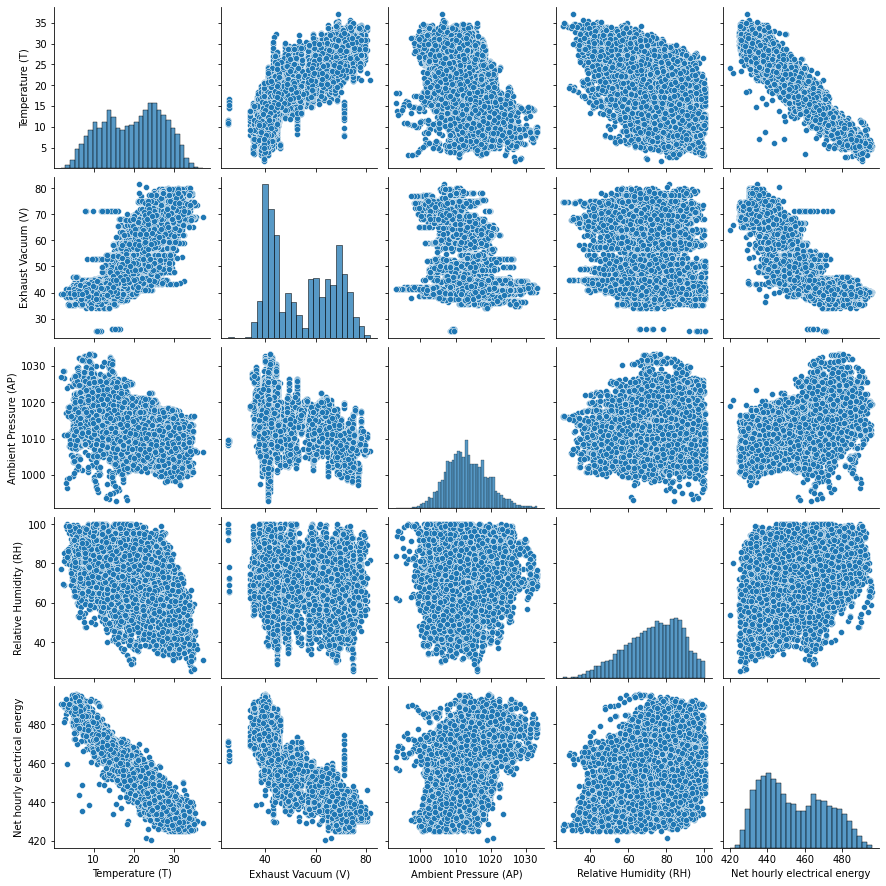

<Figure size 432x288 with 0 Axes>

In [16]:
#pairplots
sns.pairplot(data)
plt.show()
plt.tight_layout()


# Normalization Techniques at a Glance
Four common normalization techniques may be useful:

scaling to a range

clipping

log scaling

z-score

# Scaling to a range

Recall from MLCC that scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range—usually 0 and 1 (or sometimes -1 to +1). Use the following simple formula to scale to a range:

Scaling to a range is a good choice when both of the following conditions are met:

You know the approximate upper and lower bounds on your data with few or no outliers.
Your data is approximately uniformly distributed across that range.

In [17]:
data.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))


,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,0.63,0.71,0.23,0.36,0.43
1,0.34,0.33,0.33,0.55,0.68
2,0.91,0.75,0.52,0.11,0.10
3,0.46,0.43,0.57,0.32,0.65
4,0.74,0.78,0.60,0.05,0.29
...,...,...,...,...,...
9563,0.58,0.57,0.48,0.12,0.47
9564,0.68,0.75,0.24,0.45,0.35
9565,0.16,0.13,0.50,0.85,0.88
9566,0.36,0.22,0.48,0.51,0.79


In [18]:
data

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [19]:
df_norm = (data - data.mean()) / (data.max() - data.min())
print(df_norm.mean())
print(5*"\n")

print(df_norm.max() - df_norm.min())

Temperature (T)                -1.449876e-15
Exhaust Vacuum (V)             -3.959837e-15
Ambient Pressure (AP)          -6.952925e-14
Relative Humidity (RH)          1.457938e-15
Net hourly electrical energy   -1.169094e-14
dtype: float64






Temperature (T)                 1.0
Exhaust Vacuum (V)              1.0
Ambient Pressure (AP)           1.0
Relative Humidity (RH)          1.0
Net hourly electrical energy    1.0
dtype: float64


In [20]:

# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
data_normalized = min_max_scaling(data)

data_normalized

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9563,0.420397,0.432918,0.522643,0.877212,0.526755
9564,0.322380,0.245907,0.761693,0.552547,0.653775
9565,0.835977,0.871352,0.495669,0.146381,0.123311
9566,0.642210,0.784520,0.518931,0.493700,0.205033


In [21]:
# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

data_normalized = min_max_scaling(data)

data_normalized

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9563,0.420397,0.432918,0.522643,0.877212,0.526755
9564,0.322380,0.245907,0.761693,0.552547,0.653775
9565,0.835977,0.871352,0.495669,0.146381,0.123311
9566,0.642210,0.784520,0.518931,0.493700,0.205033


In [22]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

df_norm

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9563,0.420397,0.432918,0.522643,0.877212,0.526755
9564,0.322380,0.245907,0.761693,0.552547,0.653775
9565,0.835977,0.871352,0.495669,0.146381,0.123311
9566,0.642210,0.784520,0.518931,0.493700,0.205033


# statistics analysis

In [23]:
data

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [24]:
data.describe()

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [25]:
data.corr()

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
Temperature (T),1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhaust Vacuum (V),0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient Pressure (AP),-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative Humidity (RH),-0.542535,-0.312187,0.099574,1.000000,0.389794
Net hourly electrical energy,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [26]:
data.corr()["Net hourly electrical energy"].sort_values(ascending=False)

Net hourly electrical energy    1.000000
Ambient Pressure (AP)           0.518429
Relative Humidity (RH)          0.389794
Exhaust Vacuum (V)             -0.869780
Temperature (T)                -0.948128
Name: Net hourly electrical energy, dtype: float64

As seen above there is strong positive correlation between Net Hourly Electrical Energy Output and Ambient Pressure while very strong negative correlation between Net Hourly Electrical Energy Output and Average Temperature or Exhaust Vacuum. Lets visualize this correlation with seaborn heatmap below:

<AxesSubplot:>

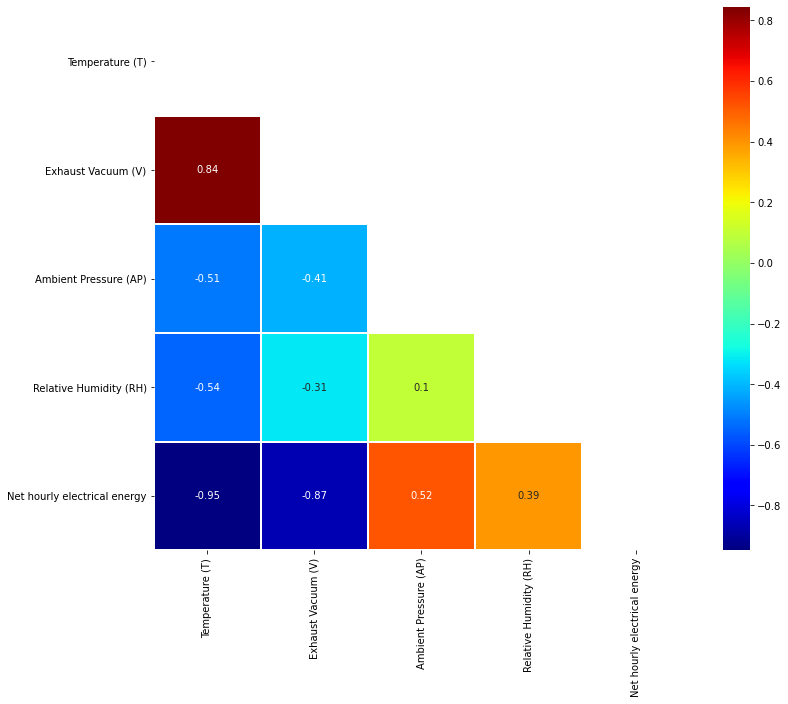

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

# Data Visualization¶

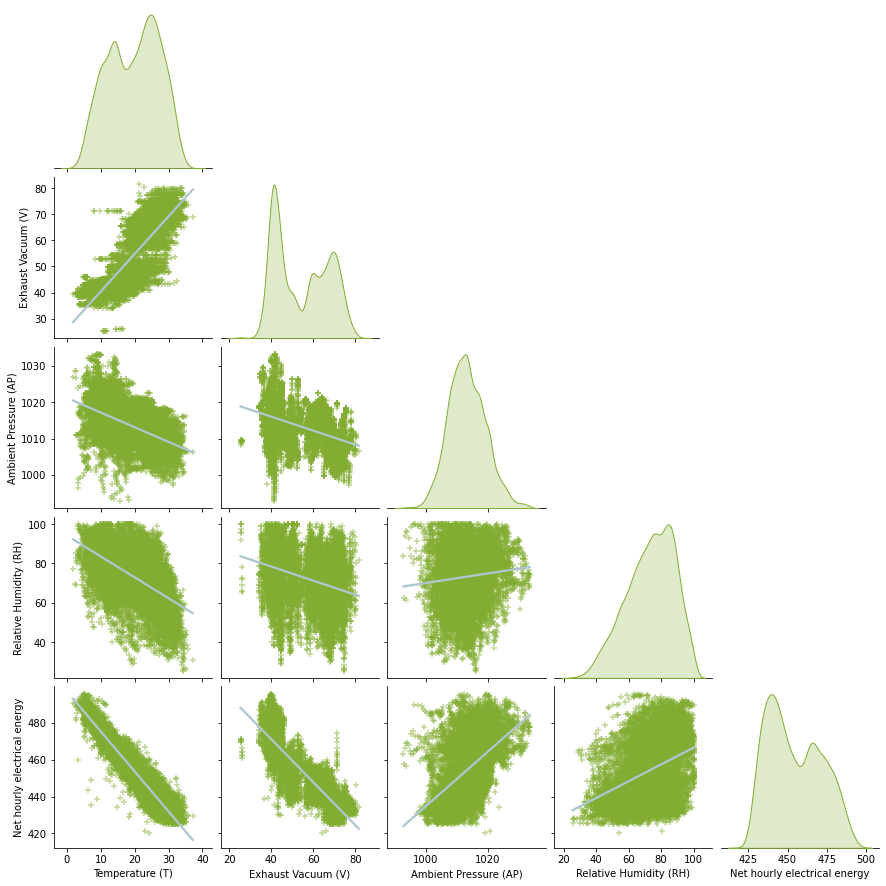

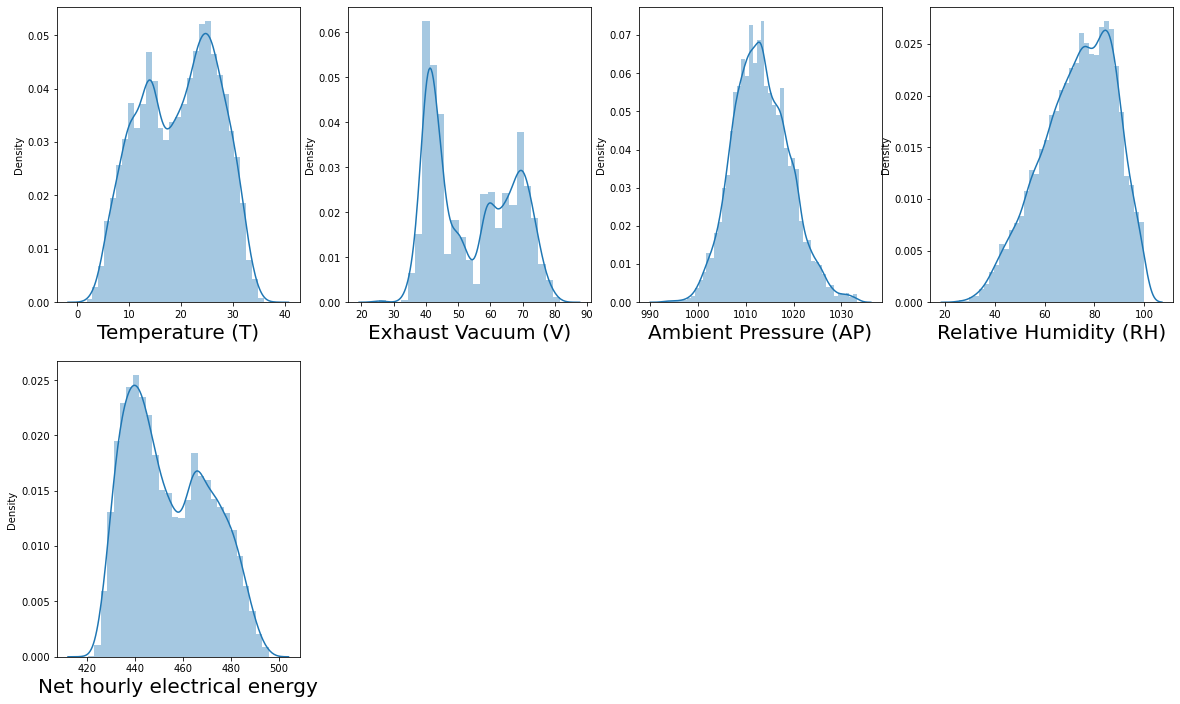

In [28]:
sns.pairplot(data,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})



# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=5 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Relative Humidity (RH)', ylabel='Net hourly electrical energy'>

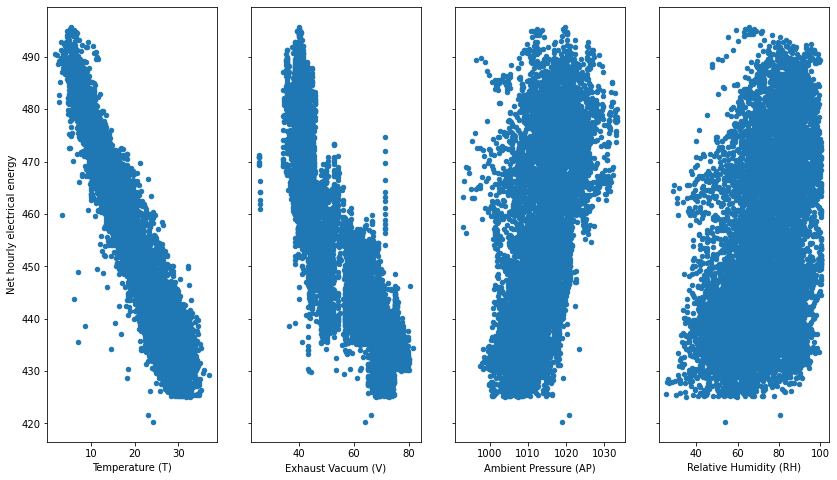

In [29]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='Temperature (T)', y='Net hourly electrical energy', ax=axs[0], figsize=(14, 8))
data.plot(kind='scatter', x='Exhaust Vacuum (V)', y='Net hourly electrical energy', ax=axs[1])
data.plot(kind='scatter', x='Ambient Pressure (AP)', y='Net hourly electrical energy', ax=axs[2])
data.plot(kind='scatter', x='Relative Humidity (RH)', y='Net hourly electrical energy', ax=axs[3])


In [30]:
data.columns


Index(['Temperature (T)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)',
       'Relative Humidity (RH)', 'Net hourly electrical energy'],
      dtype='object')

outliers = []
def detect_outliers_zscore(data):
    thres = 100
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(data)
print("Outliers from Z-scores method: ", sample_outliers)

outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1print("Outliers from IQR method: ", sample_outliers)

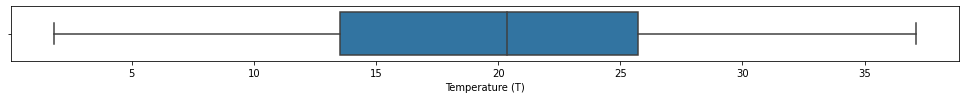

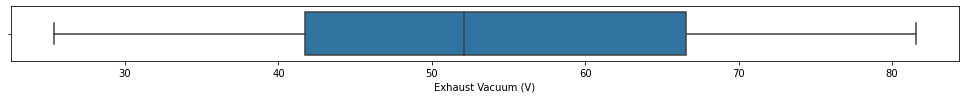

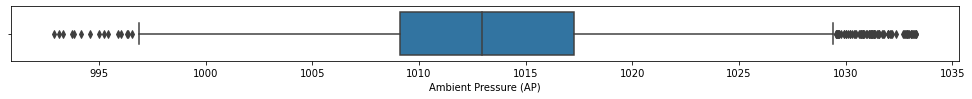

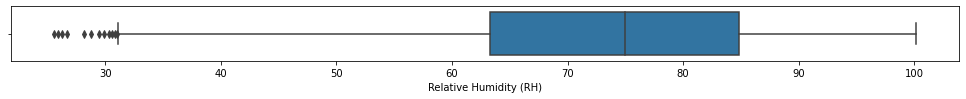

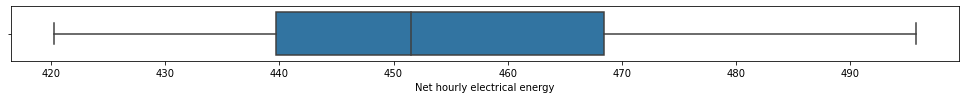

In [31]:
for column in data:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)

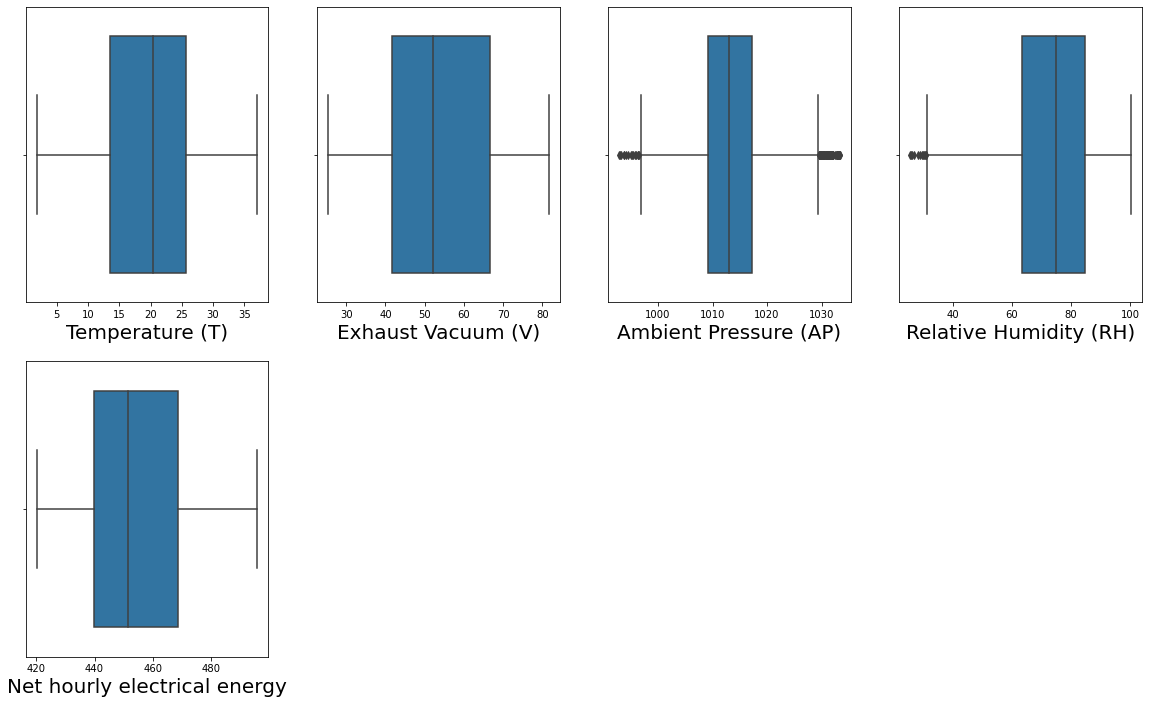

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=5 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column],x=column)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

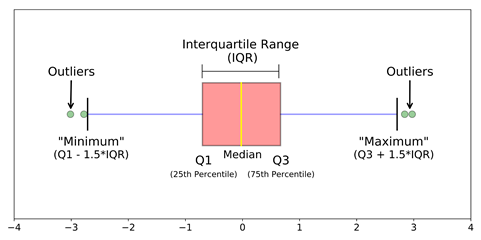

In [33]:
from IPython.display import Image
Image("12311IQR.png")

outliers = []
def detect_outliers_iqr(data):
    
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data)
print("Outliers from IQR method: ", sample_outliers)

In [34]:
data

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [35]:
data1 = sorted(data)
data1

['Ambient Pressure (AP)',
 'Exhaust Vacuum (V)',
 'Net hourly electrical energy',
 'Relative Humidity (RH)',
 'Temperature (T)']

# Model building:

In [36]:
X= data.drop(columns=["Net hourly electrical energy"])
y=data["Net hourly electrical energy"]

In [37]:
X

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH)
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [38]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: Net hourly electrical energy, Length: 9568, dtype: float64

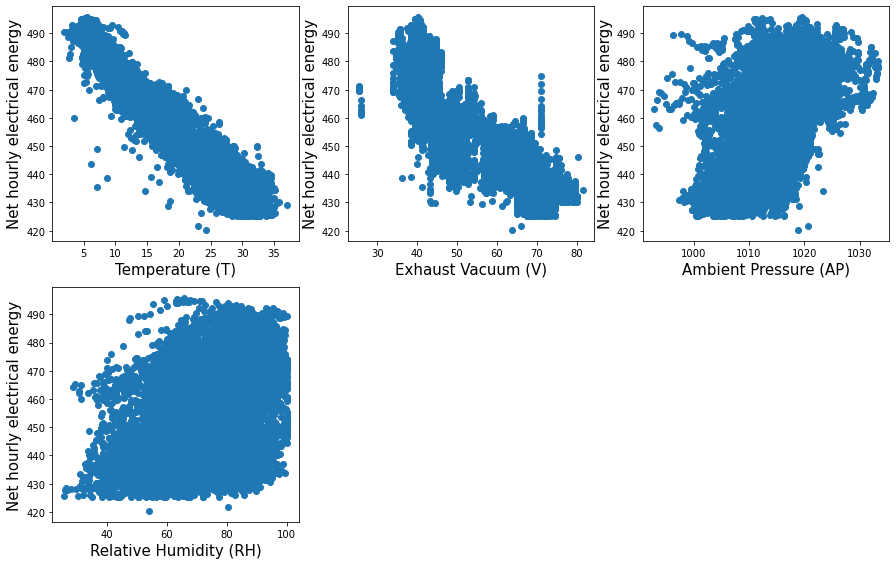

In [39]:
plt.figure(figsize=(15,25),facecolor="white")
plotnumber=1

for column in X:
    if plotnumber<=4:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("Net hourly electrical energy",fontsize=15)
    plotnumber+=1
plt.show()    

In [40]:
X.head()

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH)
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
data

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(X)

StandardScaler()

In [46]:
scaler.mean_

array([  19.65123119,   54.30580372, 1013.25907818,   73.30897784])

In [47]:
scaler.transform(X)

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ],
       ...,
       [ 1.56583973,  1.57581141, -0.05709854, -2.52261812],
       [ 0.64797565,  1.19177803,  0.1011913 , -0.74790051],
       [ 0.26150656,  0.64641916,  0.66867722, -0.37254534]])

In [48]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ],
       ...,
       [ 1.56583973,  1.57581141, -0.05709854, -2.52261812],
       [ 0.64797565,  1.19177803,  0.1011913 , -0.74790051],
       [ 0.26150656,  0.64641916,  0.66867722, -0.37254534]])

In [49]:
X.columns

Index(['Temperature (T)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)',
       'Relative Humidity (RH)'],
      dtype='object')

In [50]:
df=pd.DataFrame(X_scaled,columns=['Temperature (T)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)',
       'Relative Humidity (RH)'])
df

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH)
0,-0.629519,-0.987297,1.820488,-0.009519
1,0.741909,0.681045,1.141863,-0.974621
2,-1.951297,-1.173018,-0.185078,1.289840
3,0.162205,0.237203,-0.508393,0.228160
4,-1.185069,-1.322539,-0.678470,1.596699
...,...,...,...,...
9563,-0.402737,-0.363242,0.126450,1.211755
9564,-0.867037,-1.190331,1.753131,-0.447205
9565,1.565840,1.575811,-0.057099,-2.522618
9566,0.647976,1.191778,0.101191,-0.747901


In [51]:
df["Temperature (T)"].mean()

-1.7198129765344646e-16

In [52]:
df["Exhaust Vacuum (V)"].mean()

-2.6002286537233624e-16

In [53]:
df["Ambient Pressure (AP)"].mean()

5.504863566100742e-15

In [54]:
df["Relative Humidity (RH)"].mean()

-3.490855412242425e-16

In [55]:
df["Temperature (T)"].std()

1.0000522616217153

In [56]:
df["Exhaust Vacuum (V)"].std()

1.0000522616217116

In [57]:
df["Ambient Pressure (AP)"].std()

1.0000522616217107

In [58]:
df["Relative Humidity (RH)"].std()

1.0000522616217158

# variance_inflation_factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
variables = X_scaled

In [61]:
vif = pd.DataFrame()
vif

""


In [62]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["VIF"]

0    5.977602
1    3.943003
2    1.452639
3    1.705290
Name: VIF, dtype: float64

In [63]:
variables.shape[0]

9568

In [64]:
variables.shape[1]

4

In [65]:
variables.shape

(9568, 4)

In [66]:
range(variables.shape[1])

range(0, 4)

In [67]:
range(variables.shape[0])

range(0, 9568)

In [68]:
for i in range(variables.shape[1]):
    print(i)

0
1
2
3


In [69]:
variance_inflation_factor(variables, 1)

3.9430030401259746

In [70]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X.columns

In [71]:
vif

,VIF,features
0,5.977602,Temperature (T)
1,3.943003,Exhaust Vacuum (V)
2,1.452639,Ambient Pressure (AP)
3,1.705290,Relative Humidity (RH)


## Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

## Great. Let's go ahead and use linear regression and see how good it fits our data.
## But first. let's split our data in train and test.

# Variance Inflation Factor (VIF) Explained



Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. In R use the corr function and in python this can by accomplished by using numpy's corrcoef function.

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

A common R function used for testing regression assumptions and specifically multicolinearity is "VIF()" and unlike many statistical concepts, its formula is straightforward:


#  V.I.F. = 1 / (1 - R^2)


# (1 - R^2) =Tolerance

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

# Steps for Implementing VIF

    Run a multiple regression.
    
    Calculate the VIF factors.
    
    Inspect the factors for each predictor variable, 
    
## if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable. 

## if the VIF is between 0-5 , multicolinearity is normal and you should consider dropping the variable.

##  0 - no corelation
##  5-normal (modrate)
##  10- extreme corelation with variable

In [72]:
vif

,VIF,features
0,5.977602,Temperature (T)
1,3.943003,Exhaust Vacuum (V)
2,1.452639,Ambient Pressure (AP)
3,1.705290,Relative Humidity (RH)


## Now what should be the VIF threshold value to decide whether the variable should be removed or not?


It is always desirable to have VIF value as small as possible, but it can lead to many significant independent variables to be removed from the dataset. Therefore a VIF = 5 is often taken as a threshold. Which means that any independent variable greater than 5 will have to be removed. 

# VIF > 5 is cause for concern and 
# VIF > 10 indicates a serious collinearity problem.

# New model

In [73]:
# 5.97760-Temperature (T) > 5 # which cause collinearity problem

In [74]:
X

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH)
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [75]:
X1=X.drop(["Temperature (T)"],axis=1,inplace=True)

In [76]:
X1=X

In [77]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: Net hourly electrical energy, Length: 9568, dtype: float64

In [78]:
scaler = StandardScaler()
X_scaled_ = scaler.fit_transform(X1)
X_scaled_

array([[-0.98729659,  1.8204884 , -0.00951935],
       [ 0.68104512,  1.1418628 , -0.97462052],
       [-1.17301765, -0.18507756,  1.2898397 ],
       ...,
       [ 1.57581141, -0.05709854, -2.52261812],
       [ 1.19177803,  0.1011913 , -0.74790051],
       [ 0.64641916,  0.66867722, -0.37254534]])

In [79]:
pd.DataFrame(X_scaled_)

,0,1,2
0,-0.987297,1.820488,-0.009519
1,0.681045,1.141863,-0.974621
2,-1.173018,-0.185078,1.289840
3,0.237203,-0.508393,0.228160
4,-1.322539,-0.678470,1.596699
...,...,...,...
9563,-0.363242,0.126450,1.211755
9564,-1.190331,1.753131,-0.447205
9565,1.575811,-0.057099,-2.522618
9566,1.191778,0.101191,-0.747901


In [80]:
X1.columns

Index(['Exhaust Vacuum (V)', 'Ambient Pressure (AP)',
       'Relative Humidity (RH)'],
      dtype='object')

In [81]:
df2=pd.DataFrame(X_scaled_,columns=['Exhaust Vacuum (V)', 'Ambient Pressure (AP)',
       'Relative Humidity (RH)'])
df2

,Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH)
0,-0.987297,1.820488,-0.009519
1,0.681045,1.141863,-0.974621
2,-1.173018,-0.185078,1.289840
3,0.237203,-0.508393,0.228160
4,-1.322539,-0.678470,1.596699
...,...,...,...
9563,-0.363242,0.126450,1.211755
9564,-1.190331,1.753131,-0.447205
9565,1.575811,-0.057099,-2.522618
9566,1.191778,0.101191,-0.747901


# Traion test split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled_,y,test_size = 0.25,random_state=355) #cross_validation

In [84]:
x_train,x_test,y_train,y_test

(array([[-0.76380175,  0.81349558,  1.31655293],
        [ 1.16029989, -2.10813073, -2.30822731],
        [-0.76537566,  0.59121623, -0.48556286],
        ...,
        [-0.40573785,  1.24963461, -0.08486437],
        [ 1.29722982, -1.52380547,  0.39802869],
        [-0.83384063,  2.05287135,  0.91174471]]),
 array([[ 0.72826234, -0.02341985, -0.84310921],
        [ 1.22246923, -1.09103431,  0.03089297],
        [ 1.52387247, -1.00010185,  0.98366495],
        ...,
        [-1.0770093 ,  0.87916902,  0.37884996],
        [ 1.16738247, -1.13144874,  0.86585275],
        [-1.26351731, -0.08740936,  0.65625661]]),
 8468    467.96
 1408    426.61
 7283    463.20
 654     459.42
 8492    462.03
          ...  
 3985    455.25
 7459    429.10
 7669    462.22
 2690    428.72
 6910    465.24
 Name: Net hourly electrical energy, Length: 7176, dtype: float64,
 7910    442.75
 1138    437.57
 1440    437.43
 7679    463.51
 547     464.73
          ...  
 7075    446.72
 3177    432.26
 4758    47

In [85]:
pd.DataFrame(x_train)

,0,1,2
0,-0.763802,0.813496,1.316553
1,1.160300,-2.108131,-2.308227
2,-0.765376,0.591216,-0.485563
3,-0.226312,-0.410725,1.282990
4,-0.907814,0.788237,0.119937
...,...,...,...
7171,-0.124795,1.965307,-1.327372
7172,1.166596,-0.663315,-1.242438
7173,-0.405738,1.249635,-0.084864
7174,1.297230,-1.523805,0.398029


In [86]:
pd.DataFrame(y_train)

,Net hourly electrical energy
8468,467.96
1408,426.61
7283,463.20
654,459.42
8492,462.03
...,...
3985,455.25
7459,429.10
7669,462.22
2690,428.72


In [87]:
pd.DataFrame(x_test)

,0,1,2
0,0.728262,-0.023420,-0.843109
1,1.222469,-1.091034,0.030893
2,1.523872,-1.000102,0.983665
3,-0.639463,-0.481450,1.574096
4,-0.639463,0.631631,0.957637
...,...,...,...
2387,-0.539520,-0.808133,-0.488303
2388,1.167382,-0.971475,-0.158155
2389,-1.077009,0.879169,0.378850
2390,1.167382,-1.131449,0.865853


In [88]:
pd.DataFrame(y_test)

,Net hourly electrical energy
7910,442.75
1138,437.57
1440,437.43
7679,463.51
547,464.73
...,...
7075,446.72
3177,432.26
4758,479.97
3260,436.00


# LinearRegression

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [91]:
import pickle

In [92]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [93]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[5,5,5]]))
a

array([-71.80301461])

In [94]:
regression.score(x_train,y_train)

0.8057065000018804

In [95]:
regression.score(x_train,y_train) # R**2 oefficient of determination # accuracy

0.8057065000018804

In [96]:
y_hat=regression.predict(x_test) 
y_hat[0:10]

array([443.03615663, 435.21118906, 433.88297374, 464.57964037,
       466.84953956, 435.80415208, 449.86442808, 431.29463646,
       441.80680819, 430.64813162])

In [97]:
regression.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [98]:
regression.set_params()

LinearRegression()

In [99]:
regression.coef_

array([-12.75763155,   3.32654055,   2.32425568])

In [100]:
regression.intercept_

454.36456773665566

In [101]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [102]:
adj_r2(x_train,y_train)

0.8056252283203419

In [103]:
regression.score(x_train,y_train)

0.8057065000018804

Our r2 score is 80.56% and adj r2 is 80.57% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [104]:
regression.score(x_test,y_test) #mse #r2_score_value

0.7984703797459052

In [105]:
adj_r2(x_test,y_test)

0.7982172018310131

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [106]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [107]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 5 cross validations
lasscv = LassoCV(alphas = None,cv =5, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=5, max_iter=100000, normalize=True)

In [108]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00017585412641667232

In [109]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00017585412641667232)

In [110]:
lasso_reg

Lasso(alpha=0.00017585412641667232)

In [111]:
lasso_reg.score(x_test, y_test)

0.7984702040597853

our r2_score for test data (79.84%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [112]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 5 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=5,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.6625977 , 9.1488983 , 0.3585681 , 2.05436866, 3.56309465,
       4.33586724, 3.16706485, 3.34671722, 1.3339483 , 2.71902782,
       9.05550661, 4.87964441, 7.0149976 , 8.71554593, 8.63150812,
       0.70580404, 9.98690174, 7.69533111, 7.09383232, 8.00570152,
       1.88180518, 0.58560994, 4.23766201, 6.30857897, 0.65941926,
       0.38238289, 5.77470608, 1.39233315, 6.5800893 , 0.44798864,
       0.75666988, 0.99267673, 1.50405618, 5.32370669, 4.93260079,
       0.46472357, 5.34047682, 2.78626445, 5.77460174, 2.94037011,
       7.49584074, 6.16982603, 8.28221091, 0.15703144, 4.4936897 ,
       0.08306814, 3.80687744, 0.57867938, 1.82121658, 6.52012346]),
        cv=5, normalize=True)

In [113]:
ridgecv.alpha_

0.08306813692640747

In [114]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.08306813692640747)

In [115]:
ridge_model.score(x_test, y_test)

0.7984704699334937

In [116]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =5)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [117]:
elasticCV.alpha_

0.029805832546651114

In [118]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [119]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.029805832546651114)

In [120]:
elasticnet_reg.score(x_test, y_test)

0.7984323838847489

In [121]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
# The coefficients

print("Coefficients: \n", regression.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_hat))

Coefficients: 
 [-12.75763155   3.32654055   2.32425568]
Mean squared error: 57.95
Coefficient of determination: 0.80


In [131]:
# Plot outputs

# generate random data-set
np.random.seed(0)
x = X
y = y

x= x.values.reshape(-1, 1)
y= y.values.reshape(-1, 1)

x.shape[0] != y.shape[0]
# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [28704, 1]

In [ ]:
type(y_test)

In [ ]:
y_new=y_test.to_numpy

In [ ]:
y_hat

In [ ]:
y_new